# 线性回归

**线性模型就是对输入特征加权求和，再加上一个常数偏置项(也叫截距项)。**


**公式4-1：线性回归模型预测**
$$
\hat y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
$$
- $\hat y$是预测值
- n是特征的数量
- $x_i$是第i个特征值
- $\theta_j$是第j个模型参数


**公式4-2：线性回归模型预测（向量化）**
$$
\hat y = h_{\theta}(X) = \theta^T \cdot X
$$
- $\theta$是模型的参数向量
- $\theta^T$是$\theta$的转置向量
- X是实例的特征向量
- $\theta^T \cdot X$是$\theta^T$和$X$的点积
- $h_\theta$是使用模型参数$\theta$的假设函数


回归模型最常见的性能指标是均方根误差（RMSE）。因此，在训练线性回归模型时，你需要找到最小化RMSE的$\theta$值。在实践中，最小化均方误差（MSE）比最小化RMSE更简单。

**公式4-3：线性回归模型的MSE成本函数**
$$
MSE(X, h_\theta) = \frac 1 m \sum_{i=1}^{m} (\theta^T \cdot X^{(i)} - y^{(i)})^2
$$

## 标准方程

为了得到使成本函数最小的$\theta$值，有一个闭式解方法

**公式4-4：标准方程**
$$
\hat \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$
- $\hat \theta$是使成本函数最小的$\theta$值
- y是包含$y^{(1)}$到$y^{(m)}$的目标值向量


In [1]:
# 测试方程
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

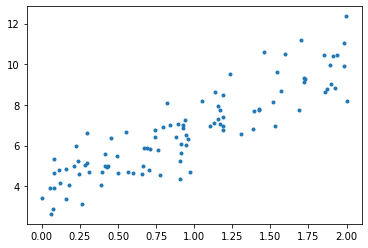

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y, marker='.')
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.71546773]
 [3.1698277 ]]


我们期待的是$\theta_0=4$,$\theta_1=3$，得到的是$\theta_0=3.7$,$\theta_1=3.1$。非常接近，噪声的存在使得其不可能完全还原为原本的函数。

现在可以用$\hat \theta$做出预测：

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.71546773]
 [10.05512314]]


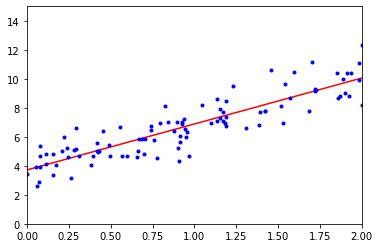

In [7]:
# 绘制模型的预测结果
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# Scikit-learn的等效代码如下
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

lin_reg.predict(X_new)

[3.71546773] [[3.1698277]]


array([[ 3.71546773],
       [10.05512314]])

## 计算复杂度

标准方程求逆的矩阵$X^T \cdot X$，是一个$n \times n$矩阵（n是特征数量）。对这种矩阵求逆的计算复杂度通常为$O(n^{2.4})$到$O(n^{3})$之间（取决于计算实现）。换句话说，如果将特征数量翻倍，那么计算时间将乘以大约$2^{2.4}=5.3$倍到$2^{3}=8$倍之间。

好的一面是，相对于训练集中的实例数量(O(m))来说，方程是线性的。

# 梯度下降

应用梯度下降时，需要保证所有特征值的大小比例差不多，否则收敛的时间会长很多。

训练模型也就是搜寻使成本函数（在训练集上）最小化的参数组合。这是模型*参数空间*层面上的搜索：模型的参数越多，这个空间的维度就越多，搜索就越难。

## 批量梯度下降

要实现梯度下降，你需要计算每个模型关于参数$\theta_j$的成本函数的梯度。换言之，你需要计算的时如果改变$\theta_j$，成本函数会改变多少。这被称为*偏导数*。

公式4-5：成本函数的偏导数
$$
\frac {\partial MSE(\theta)} {\partial \theta_j} = \frac 2 m \sum_{i=1}^m (\theta^T \cdot x^{(i)} - y^{(i)})x_j^{(i)}
$$

如果不想单独计算这些梯度，可以使用公式4-6对其进行一次性计算。梯度向量，记作$\nabla_{\theta}MSE(\theta)$，包含所有成本函数（每一个模型参数一个）的偏导数。

公式4-6：成本函数的梯度向量
$$
\nabla_{\theta} MSE(\theta) = 
$$

批量梯度下降：每一步都使用整批训练数据。

一旦有了梯度向量，哪个点向上，就朝反方向下坡。也就是从$\theta$中减去$\nabla_{\theta}MSE(\theta)$，这时学习率$\eta$就发挥作用了：用梯度向量乘以$\eta$确定下坡步长的大小。

公式4-7：梯度下降步长
$$
\theta^{(next step)} = \theta - \eta \nabla_{\theta}MSE(\theta)
$$

In [9]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initiazation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[3.71546773]
 [3.1698277 ]]


**怎么选择学习率？**

可以用网格搜索

**怎么限制迭代次数？**

在开始时设置一个非常大的迭代次数，但是当梯度向量的值变得很微小时中断算法——也就是相当于它的范数变得低于$\varepsilon$（称为容差）时，因为这时梯度下降已经（几乎）达到了最小值。


**收敛率**

成本函数为凸函数，并且斜率没有陡峭的变化时（如MSE成本函数），通过批量梯度下降可以看出一个固定的学习率有一个收敛率，为$0(\frac 1 {迭代次数})$。换句话说，如果将容差$\varepsilon$缩小为原来的1/10（以得到更精确的解），算法将不得不运行10倍的迭代次数。

## 随机梯度下降

由于算法的随机性质，它比批量梯度下降要不规则得多。
成本函数将不再是缓缓降直到抵达最小值，而是不断上上下下，但是从整体来看，还是缓慢下降。
但即使它到达了最小值，依然还会持续反弹，永远不会停止。所以算法停下来的参数值肯定是足够好的，但不是最优的。
当成本函数非常不规则时，随机梯度下降其实可以帮助算法跳出局部最小值，所以相比批量梯度下降，它对找到全局最小值更有优势。

因此，随机性的好处在于可以跳出局部最优，缺点是永远定位不出最小值。
一个折中的办法是：逐步降低学习率。这个过程叫做*模拟退火*。

In [11]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[3.7453128]
 [3.1941829]]


## 小批量梯度下降

介于批量梯度下降和随机梯度下降之间，每次选择一定数量的实例计算梯度。

**线性回归算法比较**

|算法|实例很多|是否支持核外|特征很多|超参数|是否需要缩放|
|--- |--- | ---      |--- |---   |---      |
|标准方程|快|否|慢|0|否|
|批量梯度下降|慢|否|快|2|是|
|随机梯度下降|快|是|快|>=2|是|
|小批量梯度下降|快|是|快|>=2|是|
